In [223]:
import warnings
warnings.filterwarnings('ignore')

In [224]:
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"
!python --version
!nvidia-smi

2.0.1+cu118
11.8
Python 3.10.12
/bin/bash: line 1: nvidia-smi: command not found


In [225]:
%pip install torch torchvision torchaudio

In [226]:
# If something breaks in the notebook it is probably related to a mismatch between the Python version, CUDA or torch
import torch
pytorch_version = f"torch-{torch.__version__}.html"
%pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version
%pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version
%pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version
%pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version
%pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-2.0.1+cu118.html
Looking in links: https://pytorch-geometric.com/whl/torch-2.0.1+cu118.html
Looking in links: https://pytorch-geometric.com/whl/torch-2.0.1+cu118.html
Looking in links: https://pytorch-geometric.com/whl/torch-2.0.1+cu118.html


In [227]:
%pip install neo4j
%pip install neo4j-driver

In [228]:
import pandas as pd
from neo4j import GraphDatabase

In [229]:
driver = GraphDatabase.driver("neo4j+s://96cb001d.databases.neo4j.io", auth=("neo4j", "0-68xN6Odlv5Hcde-ZazoikB8IrvOYW5-4_cVfvVeeQ"))
session = driver.session()

In [230]:
result = session.run("""MATCH (n) RETURN n.author_id as author_id,n.data as data""")
print(result)
data = result.data()

In [231]:
df = pd.DataFrame(data)

In [232]:
df.head()

,author_id,data
0,authorID_9a049_b03f6_fc40b_fcf2f_13632,None
1,authorID_1be00_34108_2e25c_4e251_ca671,None
2,authorID_c2356_069e9_d1e79_ca924_37815,None
3,authorID_3635a_91e3d_a857f_7847f_68185,None
4,authorID_cba28_b89eb_85949_7f544_956d6,None


In [233]:
df.shape

(347, 2)

In [234]:
def data_feature_creation(num):
  global session,df
  result = session.run("""MATCH (n) RETURN n.Feature%s"""%str(num) +""" as Feature%s"""%str(num))
  data = result.data()
  lis=[]
  for i in range(df.shape[0]):
    lis.append(int(data[i]['Feature'+str(num)]))
  df['Feature'+str(num)] = lis

In [235]:
for i in range(1,225):
  data_feature_creation(i)

In [236]:
df.head()

,author_id,data,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature215,Feature216,Feature217,Feature218,Feature219,Feature220,Feature221,Feature222,Feature223,Feature224
0,authorID_9a049_b03f6_fc40b_fcf2f_13632,None,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,1,0,1,0
1,authorID_1be00_34108_2e25c_4e251_ca671,None,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,authorID_c2356_069e9_d1e79_ca924_37815,None,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,authorID_3635a_91e3d_a857f_7847f_68185,None,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,authorID_cba28_b89eb_85949_7f544_956d6,None,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [237]:
#now the data is going to be the count of authors the author has worked with
def data_attribute_creation(check):
    global session,df
    result = session.run('''
    MATCH (author1)-[:CO_AUTHORED]->(author2)
    where author1.author_id="%s"'''%str(check)+''' and author2.author_id<>"%s"
    RETURN author2.author_id'''%str(check))
    data = result.data()
    return (len(data))

In [238]:
lis = []
for i in df['author_id']:
  lis.append(data_attribute_creation(i))
df['data']=lis

In [239]:
df = df.sort_values(by=["data"],ascending=False,ignore_index=True)

In [240]:
df.head()

,author_id,data,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature215,Feature216,Feature217,Feature218,Feature219,Feature220,Feature221,Feature222,Feature223,Feature224
0,authorID_f10d9_1a759_6bf5a_67735_79ff1,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,authorID_b7a56_873cd_771f2_c446d_369b6,39,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,authorID_49d18_0ecf5_61328_19571_bf39d,38,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3,authorID_7688b_6ef52_55596_2d008_fff89,36,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,authorID_1be00_34108_2e25c_4e251_ca671,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
df.to_csv("Dataset.csv")

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

This graph shows us the top 10 authors that are most likely to collaborate due to their high collaborations

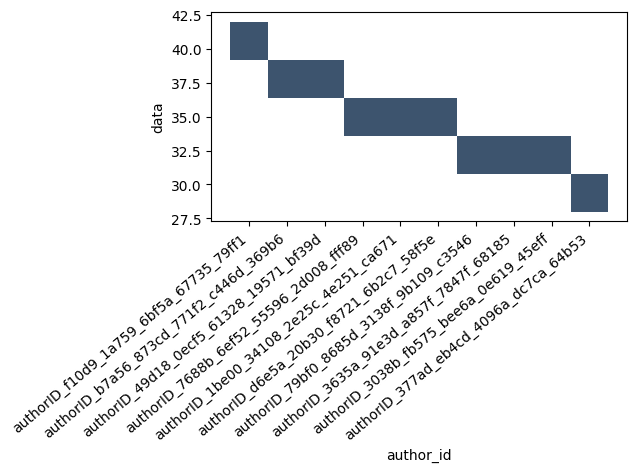

In [243]:
ax = sns.histplot(x = df['author_id'][:10], y = df['data'][:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Community detection using Louvain Algorithm

In [244]:
%pip install networkx

In [245]:
def community_check():
  lis=[]
  for i in df['author_id']:
    result = session.run('''
    MATCH (author1)-[:CO_AUTHORED]->(author2)
    where author1.author_id="%s"'''%str(i)+''' and author2.author_id<>"%s"
    RETURN author1.author_id,author2.author_id'''%str(i))
    data = result.data()
    for i in data:
      lis.append((i['author1.author_id'],i['author2.author_id']))
      lis.append((i['author2.author_id'],i['author1.author_id']))
  return lis

In [246]:
import networkx as nx
import community.community_louvain as community_louvain

# Create a graph and add author nodes and coauthored edges
G = nx.Graph()

# Assuming authors and coauthored relationships are loaded from your Neo4j database
authors = df['author_id']  # List of author IDs
coauthored_relationships = community_check()  # List of (author_id1, author_id2) tuples

for author_id in authors:
    G.add_node(author_id)

for author_id1, author_id2 in coauthored_relationships:
    G.add_edge(author_id1, author_id2)

# Perform community detection using the Louvain algorithm
partition = community_louvain.best_partition(G)

# Create a dictionary to group authors by community
communities = {}
for author_id, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(author_id)

# Print the authors in each community
for community_id, author_list in communities.items():
    print(f"Community {community_id}: {author_list}")

Community 0: ['authorID_f10d9_1a759_6bf5a_67735_79ff1', 'authorID_377ad_eb4cd_4096a_dc7ca_64b53', 'authorID_33512_00784_0ced1_bb0aa_b68f4', 'authorID_fc95c_e1766_03e9e_1d1ff_ee390', 'authorID_766cb_53c75_3baed_ac5dc_78259', 'authorID_d48ff_4b2f6_8a10f_d7c86_f185a', 'authorID_07919_63ca2_667a2_3cf32_68ad2', 'authorID_48a17_06eca_5ee61_48f74_8ca91', 'authorID_1038e_0b72d_98745_fac0f_b015f', 'authorID_624b6_0c58c_9d8bf_b6ff1_886c2', 'authorID_eb1e3_3e8a8_1b697_b7585_5af6b', 'authorID_8bd9c_0d453_53375_7387e_d019c', 'authorID_36ebe_205bc_dfc49_9a25e_6923f', 'authorID_79026_99be4_2c8a8_e46fb_bb450', 'authorID_138d9_e809e_386a7_b8007_91d1f', 'authorID_dbb1d_ed63b_c7073_2626c_5dfe6', 'authorID_01d54_579da_446ae_1e75c_da808', 'authorID_7ed8f_0f3b7_07956_d9fb1_e889e', 'authorID_80c3c_d40fa_35f90_88b87_41bd8', 'authorID_da70d_fa4d9_f95ac_979f9_21e8e', 'authorID_81178_6ad1a_e74ad_fdd20_dd037', 'authorID_482d9_673cf_ee5de_391f9_7fde4', 'authorID_bdd2d_3af3a_5a121_3497d_4f1f7', 'authorID_37c20_f19f

In [289]:
file = open('coauthored_relationships.txt','w')
for i in range(len(coauthored_relationships)):
	file.write(str(coauthored_relationships[i])+"\n")
file.close()

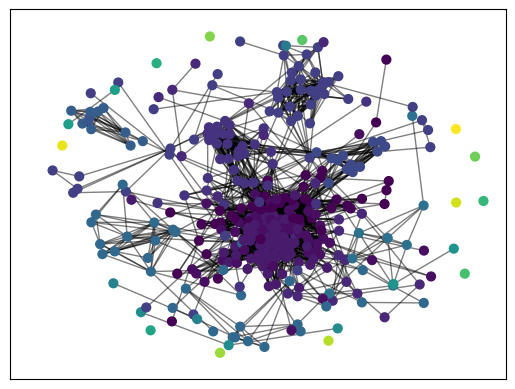

In [248]:
import matplotlib.cm as cm
# draw the graph
pos = nx.spring_layout(G,k=0.3)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [249]:
df.drop(["author_id"],axis=1).corr()

,data,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature215,Feature216,Feature217,Feature218,Feature219,Feature220,Feature221,Feature222,Feature223,Feature224
data,1.000000,-0.023877,-0.043619,-0.037664,-0.071654,-0.072725,0.081267,0.046268,0.143313,0.097989,...,0.052910,0.090955,0.259807,0.130655,0.050763,0.095394,0.049367,0.160185,0.090845,0.193675
Feature1,-0.023877,1.000000,-0.016589,-0.014325,-0.015495,-0.018602,-0.017622,-0.025259,-0.036741,-0.008222,...,0.163301,-0.020439,-0.035009,-0.025991,-0.013057,-0.019539,-0.017622,-0.008222,-0.010085,-0.008222
Feature2,-0.043619,-0.016589,1.000000,-0.020377,-0.022042,-0.026462,-0.025067,-0.035932,-0.052266,-0.011696,...,-0.023599,-0.029075,-0.049801,0.047433,-0.018574,-0.027795,-0.025067,-0.011696,-0.014346,-0.011696
Feature3,-0.037664,-0.014325,-0.020377,1.000000,-0.019033,-0.022850,-0.021645,-0.031027,-0.045130,-0.010100,...,-0.020377,-0.025105,-0.043002,-0.031926,-0.016039,-0.024001,-0.021645,-0.010100,-0.012387,-0.010100
Feature4,-0.071654,-0.015495,-0.022042,-0.019033,1.000000,-0.024717,-0.023414,-0.033562,-0.048818,-0.010925,...,-0.022042,0.085026,0.023359,-0.034534,-0.017349,0.091035,0.105548,-0.010925,-0.013400,-0.010925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Feature220,0.095394,-0.019539,-0.027795,-0.024001,0.091035,0.067153,-0.029525,0.106018,0.100268,-0.013776,...,0.081807,0.055778,0.165629,0.028754,-0.021878,1.000000,0.073962,-0.013776,0.160777,-0.013776
Feature221,0.049367,-0.017622,-0.025067,-0.021645,0.105548,-0.028109,-0.026627,0.125342,0.063400,-0.012424,...,0.095743,0.068345,0.070711,-0.039274,0.132413,0.073962,1.000000,-0.012424,0.180605,0.227087
Feature222,0.160185,-0.008222,-0.011696,-0.010100,-0.010925,-0.013116,-0.012424,-0.017809,-0.025905,-0.005797,...,-0.011696,0.193939,0.105090,-0.018325,-0.009206,-0.013776,-0.012424,1.000000,-0.007110,-0.005797
Feature223,0.090845,-0.010085,-0.014346,-0.012387,-0.013400,-0.016087,-0.015239,0.118521,0.172396,-0.007110,...,-0.014346,-0.017675,0.181951,-0.022476,-0.011292,0.160777,0.180605,-0.007110,1.000000,-0.007110


<function matplotlib.pyplot.show(close=None, block=None)>

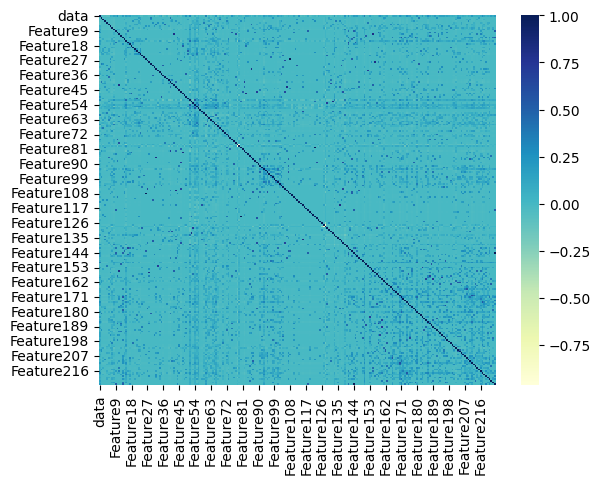

In [250]:
dataplot = sns.heatmap(df.drop(["author_id"],axis=1).corr(),cmap="YlGnBu")
plt.show

In [251]:
df.describe()

,data,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature215,Feature216,Feature217,Feature218,Feature219,Feature220,Feature221,Feature222,Feature223,Feature224
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,...,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,7.259366,0.011527,0.023055,0.017291,0.020173,0.028818,0.025937,0.051873,0.103746,0.005764,...,0.023055,0.034582,0.095101,0.054755,0.014409,0.031700,0.025937,0.005764,0.008646,0.005764
std,7.968627,0.106899,0.150294,0.130542,0.140795,0.167538,0.159176,0.222091,0.305372,0.075809,...,0.150294,0.182983,0.293778,0.227830,0.119343,0.175454,0.159176,0.075809,0.092712,0.075809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [261]:
import torch
from torch_geometric.data import Data

In [262]:
lis = []
for i in df.drop(['author_id',"data"],axis = 1).columns:
    lis.append(i)

In [263]:
# Create a mapping of author IDs to their corresponding indices
x = {author_id: idx for idx, author_id in enumerate(authors)}

# Create the edge_index from coauthored_relationships
edge_index = torch.tensor([[x[author_id1], x[author_id2]]
                           for author_id1, author_id2 in coauthored_relationships],
                          dtype=torch.long).t().contiguous()

authors = df['author_id']

author_features = {}
for index, row in df.iterrows():
    author_id = row['author_id']
    features = row[lis].tolist()
    author_features[author_id] = features

# Create the author_features tensor
author_features_tensor = torch.tensor([author_features[author_id] for author_id in authors], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

In [264]:
Data(edge_index=[2, 4], x=[3, 1])

Data(x=[2], edge_index=[2])

In [265]:
max(edge_index[1])

tensor(345)

In [266]:
df.shape[0]#this means there are isolted nodes too.

347

In [267]:
print(data.has_isolated_nodes())
print(data.has_self_loops())
print(data.is_directed())
print(data.validate(raise_on_error=True))

True
False
False
True


In [268]:
"""for i in x:
  if x[i]==2:
       print(i)"""

'for i in x:\n  if x[i]==2:\n       print(i)'

In [269]:
df.columns

Index(['author_id', 'data', 'Feature1', 'Feature2', 'Feature3', 'Feature4',
       'Feature5', 'Feature6', 'Feature7', 'Feature8',
       ...
       'Feature215', 'Feature216', 'Feature217', 'Feature218', 'Feature219',
       'Feature220', 'Feature221', 'Feature222', 'Feature223', 'Feature224'],
      dtype='object', length=226)

In [271]:
data

Data(
  x={
    authorID_f10d9_1a759_6bf5a_67735_79ff1=0,
    authorID_b7a56_873cd_771f2_c446d_369b6=1,
    authorID_49d18_0ecf5_61328_19571_bf39d=2,
    authorID_7688b_6ef52_55596_2d008_fff89=3,
    authorID_1be00_34108_2e25c_4e251_ca671=4,
    authorID_d6e5a_20b30_f8721_6b2c7_58f5e=5,
    authorID_79bf0_8685d_3138f_9b109_c3546=6,
    authorID_3635a_91e3d_a857f_7847f_68185=7,
    authorID_3038b_fb575_bee6a_0e619_45eff=8,
    authorID_377ad_eb4cd_4096a_dc7ca_64b53=9,
    authorID_29db0_c6782_dbd50_00559_ef4d9=10,
    authorID_4621c_1d55f_a4e86_ce0da_e4288=11,
    authorID_6f4b6_61212_5fb3a_0daec_d2799=12,
    authorID_27bad_c983d_f1780_b60c2_b3fa9=13,
    authorID_d6061_bbee6_cf13b_d7376_5faae=14,
    authorID_5f9c4_ab08c_ac745_7e911_1a30e=15,
    authorID_d874e_4e4a5_df211_73b0f_83e31=16,
    authorID_19581_e27de_7ced0_0ff1c_e50b2=17,
    authorID_28117_45d7b_8d887_4f6e6_53d17=18,
    authorID_a0d17_7b496_7a6d9_9f4ff_117de=19,
    authorID_27d71_9c754_aacd4_92a6d_c8a1b=20,
    authorI

In [272]:
import torch
from torch_geometric.data import Data
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np

In [273]:
class GCNRecommender(torch.nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes):
        super(GCNRecommender, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, num_classes)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

In [274]:
# Map string author IDs to unique integers
author_id_to_int = {author_id: idx for idx, author_id in enumerate(authors)}
int_authors = [author_id_to_int[author_id] for author_id in authors]

# Sample data dictionary structure (replace with your actual data)
data_dict = {
    'x': author_features_tensor,  # Tensor of author features
    'edge_index': edge_index,      # Tensor of edge indices
    'authors': authors             # List of author IDs
}

# Extract data components from the dictionary
author_features_tensor = data_dict['x']
edge_index = data_dict['edge_index']
authors = data_dict['authors']

# Instantiate the model and define an optimizer
num_features = author_features_tensor.shape[1]
hidden_dim = 64
num_classes = len(authors)

model = GCNRecommender(num_features, hidden_dim, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [275]:
# Train the Model and Print Loss and Additional Data for Each Epoch
def train():
    model.train()
    optimizer.zero_grad()
    out = model(author_features_tensor, edge_index)
    loss = F.cross_entropy(out, torch.tensor(int_authors, dtype=torch.long))
    loss.backward()
    optimizer.step()

    # Calculate predicted class labels
    _, predicted_labels = torch.max(out, 1)

    # Calculate precision, recall, accuracy, and F1-score
    precision = precision_score(int_authors, predicted_labels, average='macro')
    recall = recall_score(int_authors, predicted_labels, average='macro')
    accuracy = accuracy_score(int_authors, predicted_labels)
    f1 = f1_score(int_authors, predicted_labels, average='macro')

    return loss.item(), precision, recall, accuracy, f1

# Train loop and print loss and additional data for each epoch
loss_history = []
precision_history = []
recall_history = []
accuracy_history = []
f1_history = []

for epoch in range(200):
    loss, precision, recall, accuracy, f1 = train()
    loss_history.append(loss)
    precision_history.append(precision)
    recall_history.append(recall)
    accuracy_history.append(accuracy)
    f1_history.append(f1)

    # Print loss and additional data for each epoch
    print(f'Epoch [{epoch + 1}/200]')
    print(f'Loss: {loss}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'Accuracy: {accuracy}')
    print(f'F1-Score: {f1}')
    print('-' * 40)

Epoch [1/200]
Loss: 5.850430965423584
Precision: 3.065791894046232e-05
Recall: 0.002881844380403458
Accuracy: 0.002881844380403458
F1-Score: 6.067040800849385e-05
----------------------------------------
Epoch [2/200]
Loss: 5.82192850112915
Precision: 0.004145847508725907
Recall: 0.01440922190201729
Accuracy: 0.01440922190201729
F1-Score: 0.004901755305213518
----------------------------------------
Epoch [3/200]
Loss: 5.78702974319458
Precision: 0.01393014440872564
Recall: 0.03170028818443804
Accuracy: 0.03170028818443804
F1-Score: 0.016145086101858434
----------------------------------------
Epoch [4/200]
Loss: 5.738196849822998
Precision: 0.024272701197714026
Recall: 0.04610951008645533
Accuracy: 0.04610951008645533
F1-Score: 0.027198822850628242
----------------------------------------
Epoch [5/200]
Loss: 5.675171375274658
Precision: 0.020485934139356378
Recall: 0.043227665706051875
Accuracy: 0.043227665706051875
F1-Score: 0.023424636789190097
--------------------------------------

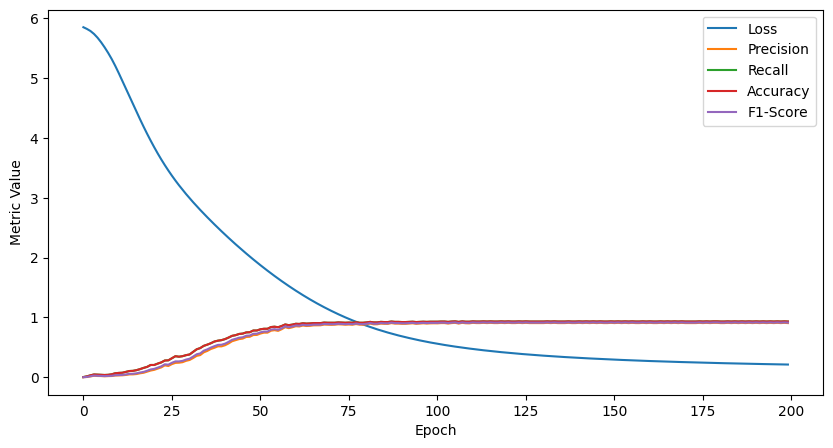

In [276]:
# Plot Loss, Precision, Recall, Accuracy, and F1-Score History
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Loss')
plt.plot(precision_history, label='Precision')
plt.plot(recall_history, label='Recall')
plt.plot(accuracy_history, label='Accuracy')
plt.plot(f1_history, label='F1-Score')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

In [277]:
import math
# Author Recommendations
def recommend_authors(query_author_idx, num_recommendations=5):
    model.eval()
    with torch.no_grad():
        out = model(author_features_tensor, edge_index)
        query_embedding = out[query_author_idx]
        distances = torch.norm(out - query_embedding, dim=1)
        likeliness = 1.0 / (1.0 + distances)  # Likeliness inversely proportional to distance
        sorted_indices = torch.argsort(likeliness,descending=True)
        recommendations = [authors[idx.item()] for idx in sorted_indices if idx != query_author_idx][:num_recommendations]
        return recommendations, sorted_indices

author_id = input("Enter Author Id ")
query_author_idx = x[author_id]
recommended_authors, sorted_indices = recommend_authors(query_author_idx)

print("Recommended Authors in Increasing Order of Likeness:")
for idx, author in enumerate(recommended_authors, start=1):
    likeness = 1.0 / (1.0 + math.log(1 + idx))
    print(f"{idx}. Author: {author}, Likeness: {likeness:.4f}")

Enter Author Id authorID_2ac87_8b0e2_18061_6993b_4b6aa
Recommended Authors in Increasing Order of Likeness:
1. Author: authorID_a88a7_902cb_4ef69_7ba0b_6759c, Likeness: 0.5906
2. Author: authorID_aea92_132c4_cbeb2_63e6a_c2bf6, Likeness: 0.4765
3. Author: authorID_01d54_579da_446ae_1e75c_da808, Likeness: 0.4191
4. Author: authorID_482d9_673cf_ee5de_391f9_7fde4, Likeness: 0.3832
5. Author: authorID_8d1ed_e4f88_9e0ed_6f082_3d8c1, Likeness: 0.3582


In [278]:
torch.save(model.state_dict(), "model.pt")

In [ ]:
df3 = pd.read_csv("coauthored_relationships.csv")
df3.head